In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Reading the dataset

In [ ]:
import csv
df = pd.read_csv("/content/Property_with_Feature_Engineering.csv")

## About the Data

In [ ]:
df.sample(5)

,property_id,location_id,page_url,property_type,price,price_bin,location,city,province_name,locality,...,area_marla,area_sqft,purpose,bedrooms,date_added,year,month,day,agency,agent
23111,13069309,1444,https://www.zameen.com/Property/dha_defence_dh...,House,42500000.0,Very High,DHA Defence,Lahore,Punjab,"DHA Defence, Lahore, Punjab",...,20.0,5445.02,For Sale,5.0,06-10-2019,2019.0,6.0,10.0,Destiny Real Estate & Builders,Shah Jahan
39784,14603745,6651,https://www.zameen.com/Property/malir_tariq_bi...,Flat,6500000.0,Medium,Malir,Karachi,Sindh,"Malir, Karachi, Sindh",...,4.0,1089.00,For Sale,0.0,02-17-2019,2019.0,2.0,17.0,NaN,NaN
37931,14510824,6839,https://www.zameen.com/Property/gulistan_e_jau...,Flat,10000000.0,High,Gulistan-e-Jauhar,Karachi,Sindh,"Gulistan-e-Jauhar, Karachi, Sindh",...,5.0,1361.25,For Sale,4.0,02-17-2019,2019.0,2.0,17.0,NaN,NaN
41039,14719970,9074,https://www.zameen.com/Property/scheme_33_gwal...,House,22000000.0,High,Scheme 33,Karachi,Sindh,"Scheme 33, Karachi, Sindh",...,9.6,2613.61,For Sale,0.0,03-10-2019,2019.0,3.0,10.0,Officers Associates,Nouman Ali Khan
77702,16323183,8469,https://www.zameen.com/Property/raiwind_road_i...,Flat,5500000.0,Medium,Raiwind Road,Lahore,Punjab,"Raiwind Road, Lahore, Punjab",...,5.0,1361.25,For Sale,2.0,06-02-2019,2019.0,6.0,2.0,AAS Properties,Muhammad Muddasar


## Checking the information about the columns of data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97675 entries, 0 to 97674
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_id    97675 non-null  int64  
 1   location_id    97675 non-null  int64  
 2   page_url       97675 non-null  object 
 3   property_type  97674 non-null  object 
 4   price          97674 non-null  float64
 5   price_bin      97674 non-null  object 
 6   location       97674 non-null  object 
 7   city           97674 non-null  object 
 8   province_name  97674 non-null  object 
 9   locality       97674 non-null  object 
 10  latitude       97674 non-null  float64
 11  longitude      97674 non-null  float64
 12  baths          97674 non-null  float64
 13  area           97674 non-null  object 
 14  area_marla     97674 non-null  float64
 15  area_sqft      97674 non-null  float64
 16  purpose        97674 non-null  object 
 17  bedrooms       97674 non-null  float64
 18  date_a

## **Statistical information** about the **numeric columns of data**

In [ ]:
df.describe()

,property_id,location_id,price,latitude,longitude,baths,area_marla,area_sqft,bedrooms,year,month,day
count,9.767500e+04,97675.000000,9.767400e+04,97674.000000,97674.000000,97674.000000,97674.000000,9.767400e+04,97674.000000,97674.000000,97674.000000,97674.000000
mean,1.436635e+07,4317.330740,1.811436e+07,29.886105,71.350516,3.128949,11.857974,3.228344e+03,3.294613,2018.873979,5.668991,11.768290
std,2.403886e+06,3711.227415,3.773551e+07,3.747797,3.149331,2.229846,66.549293,1.811811e+04,1.981863,0.331875,2.384878,7.933207
min,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000,0.000000e+00,0.000000,2018.000000,1.000000,1.000000
25%,1.321642e+07,1141.000000,1.150000e+05,24.938913,67.126094,2.000000,4.900000,1.334030e+03,2.000000,2019.000000,4.000000,5.000000
50%,1.517123e+07,3286.000000,7.800000e+06,31.461578,73.070930,3.000000,7.100000,1.932980e+03,3.000000,2019.000000,6.000000,9.000000
75%,1.616987e+07,7184.000000,1.950000e+07,33.550096,74.211009,5.000000,12.000000,3.267010e+03,5.000000,2019.000000,7.000000,18.000000
max,1.679609e+07,13971.000000,2.000000e+09,73.184088,80.161430,13.000000,12000.000000,3.267012e+06,18.000000,2019.000000,12.000000,30.000000


##**Statistical information** about the **object type columns** of data

In [ ]:
df.describe(include=object)

,page_url,property_type,price_bin,location,city,province_name,locality,area,purpose,date_added,agency,agent
count,97675,97674,97674,97674,97674,97674,97674,97674,97674,97674,57563,57563
unique,97675,7,4,1469,5,3,1545,305,2,146,4691,7997
top,https://www.zameen.com/Property/lahore_model_t...,House,Low,DHA Defence,Karachi,Punjab,"DHA Defence, Karachi, Sindh",1 Kanal,For Sale,05-06-2019,Chaudhry Estate,"Daud Ahmad(Co-CEO), Shafique Arshad Waince(Co-..."
freq,1,59995,26451,13153,33908,43353,6372,12346,67643,4333,279,271


## **Removing** the **unwanted** **columns**





In [ ]:
df.drop(columns=['location_id','property_id','page_url','year','month','price_bin','day','agency','agent','date_added','purpose','bedrooms','baths'],inplace= True)

### **Locality** column is ***combination of location,	city,	province_name columns***, so there is no need for this column. Also, there is no need for **area columns** for **seprate units**. Only use area_marla column in further analysis. Dropping these columns

In [ ]:
df.drop(columns=['locality','area','area_sqft'],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97675 entries, 0 to 97674
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  97674 non-null  object 
 1   price          97674 non-null  float64
 2   location       97674 non-null  object 
 3   city           97674 non-null  object 
 4   province_name  97674 non-null  object 
 5   latitude       97674 non-null  float64
 6   longitude      97674 non-null  float64
 7   area_marla     97674 non-null  float64
dtypes: float64(4), object(4)
memory usage: 6.0+ MB


## **Checking** for the **Null values in data**

In [ ]:
df.isnull().sum()
#There are no Null values in the desired columns

property_type    1
price            1
location         1
city             1
province_name    1
latitude         1
longitude        1
area_marla       1
dtype: int64

#**EDA**
###***1. Data Analysis/ Visualization***
###***2. Feature Scaling***
###***3. Outlier Handling***

## **1.1 Univariate Analysis**

### **Property_type** column (Categorical)

In [ ]:
df.property_type.value_counts(ascending=False)

House            59995
Flat             22966
Upper Portion     8153
Lower Portion     5146
Room               668
Farm House         461
Penthouse          285
Name: property_type, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


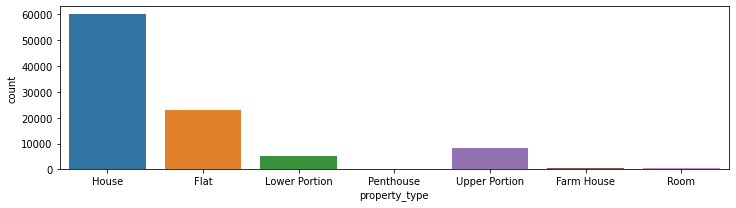

In [ ]:
plt.figure(figsize=(12, 3))
sns.countplot(df['property_type'])

### **Price** column (Numeric) and it is the **dependent column** or **Y_train**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


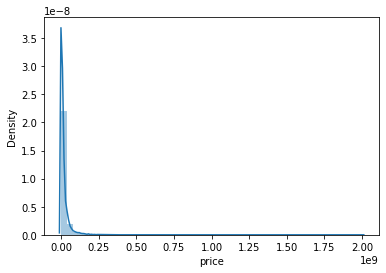

In [ ]:
sns.distplot(df['price'])

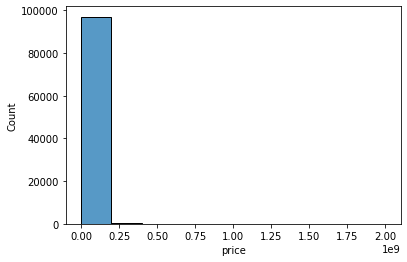

In [ ]:
sns.histplot(df['price'],bins=10)
# most price of houses lies in the range of 0-24e7 (0-240000000)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


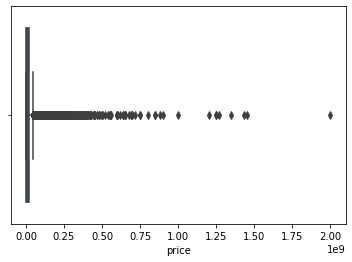

In [ ]:
# Checking for the outliers in price column data
sns.boxplot(df['price'])

### **Price column** has **large numbe**r of **outlier values**

In [ ]:
# Checking the mean value of Price column
df.price.mean()

18114364.970442493

In [ ]:
df[df['price']>df.price.mean()].info()
# There are 52577 rows, whose price is greater than the mean value

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25694 entries, 0 to 97670
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  25694 non-null  object 
 1   price          25694 non-null  float64
 2   location       25694 non-null  object 
 3   city           25694 non-null  object 
 4   province_name  25694 non-null  object 
 5   latitude       25694 non-null  float64
 6   longitude      25694 non-null  float64
 7   area_marla     25694 non-null  float64
dtypes: float64(4), object(4)
memory usage: 1.8+ MB


## **Location** column (categorical) 

### Checking the **highest 10 localities** which has the **highest proportion** of **property assets**

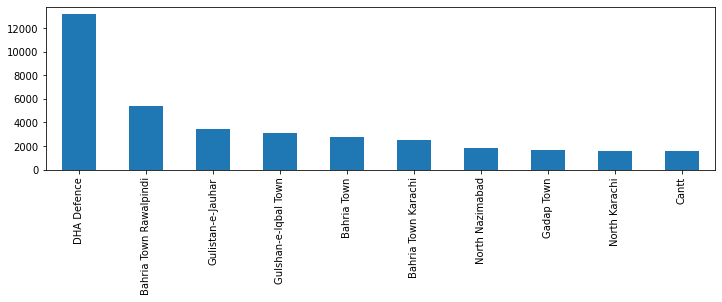

In [ ]:
plt.figure(figsize=(12, 3))
df['location'].value_counts(ascending=False).head(10).plot(kind='bar')

### **Province** Name ***column*** (categorical)

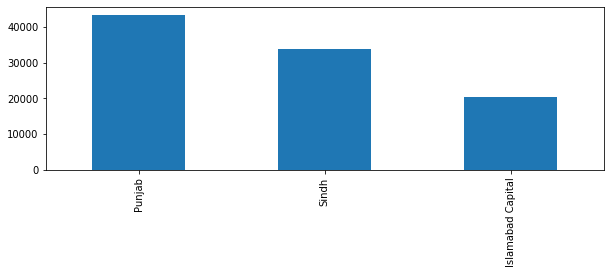

In [ ]:
plt.figure(figsize=(10, 3))
df['province_name'].value_counts(ascending=False).plot(kind='bar')

### **City** Name ***column*** (categorical)

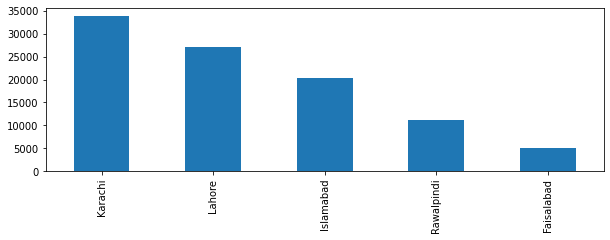

In [ ]:
plt.figure(figsize=(10, 3))
df['city'].value_counts(ascending=False).plot(kind='bar')

## **Latitude** and **Longitude** columns (numeric) 

### **Displot** of **latitude** column

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


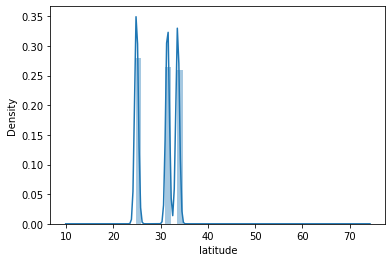

In [ ]:
#plt.figure(figsize=(12, 3))
sns.distplot(df['latitude'])


### Checking for **outliers** in **latitude**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


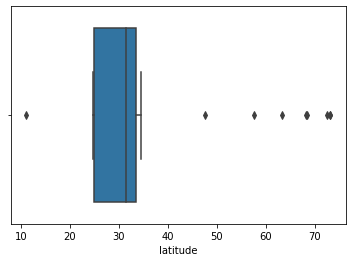

In [ ]:
sns.boxplot(df['latitude'])

### There are **outliers** in **latitude** column, in both **before lower limit**  and **after upper limit**

### **Displot** of **longitude** column

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


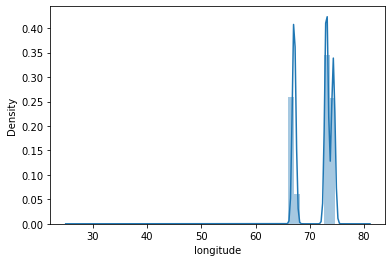

In [ ]:
sns.distplot(df['longitude'])

### Checking for **outliers** in **latitude**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


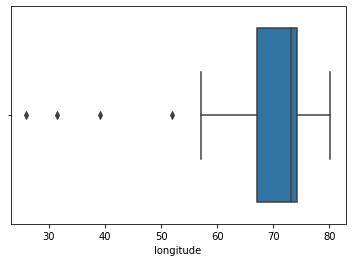

In [ ]:
sns.boxplot(df['longitude'])

### There are **outliers** in **latitude** column and only before lower limit

## Checking whether the **latitude** and **longitude** columns are **skewwed** **or normally distributed**

In [ ]:
df.latitude.skew()


-0.3917746388829118

In [ ]:
df.longitude.skew()

-0.6214472400315965

## As, the **skew**() **function** is not equal to 0, so ***these 2 columns are skewwed***

## **Area_marla** column (numeric) 

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


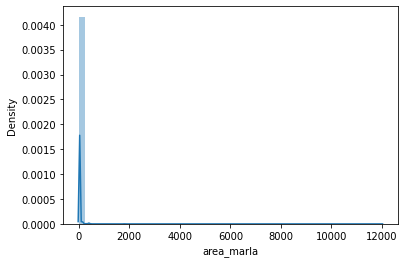

In [ ]:
sns.distplot(df['area_marla'])

## **1.2 Bivariate Analysis**

##We plot graph of **price** with all the other variables with price on **y-axis** to get the relevant information

### **Property_type and price column (Categorical and numerical)**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


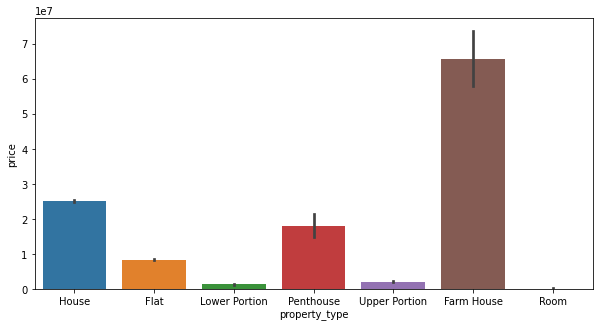

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(df['property_type'],df['price'])

### **location and price column (Categorical and numerical)**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


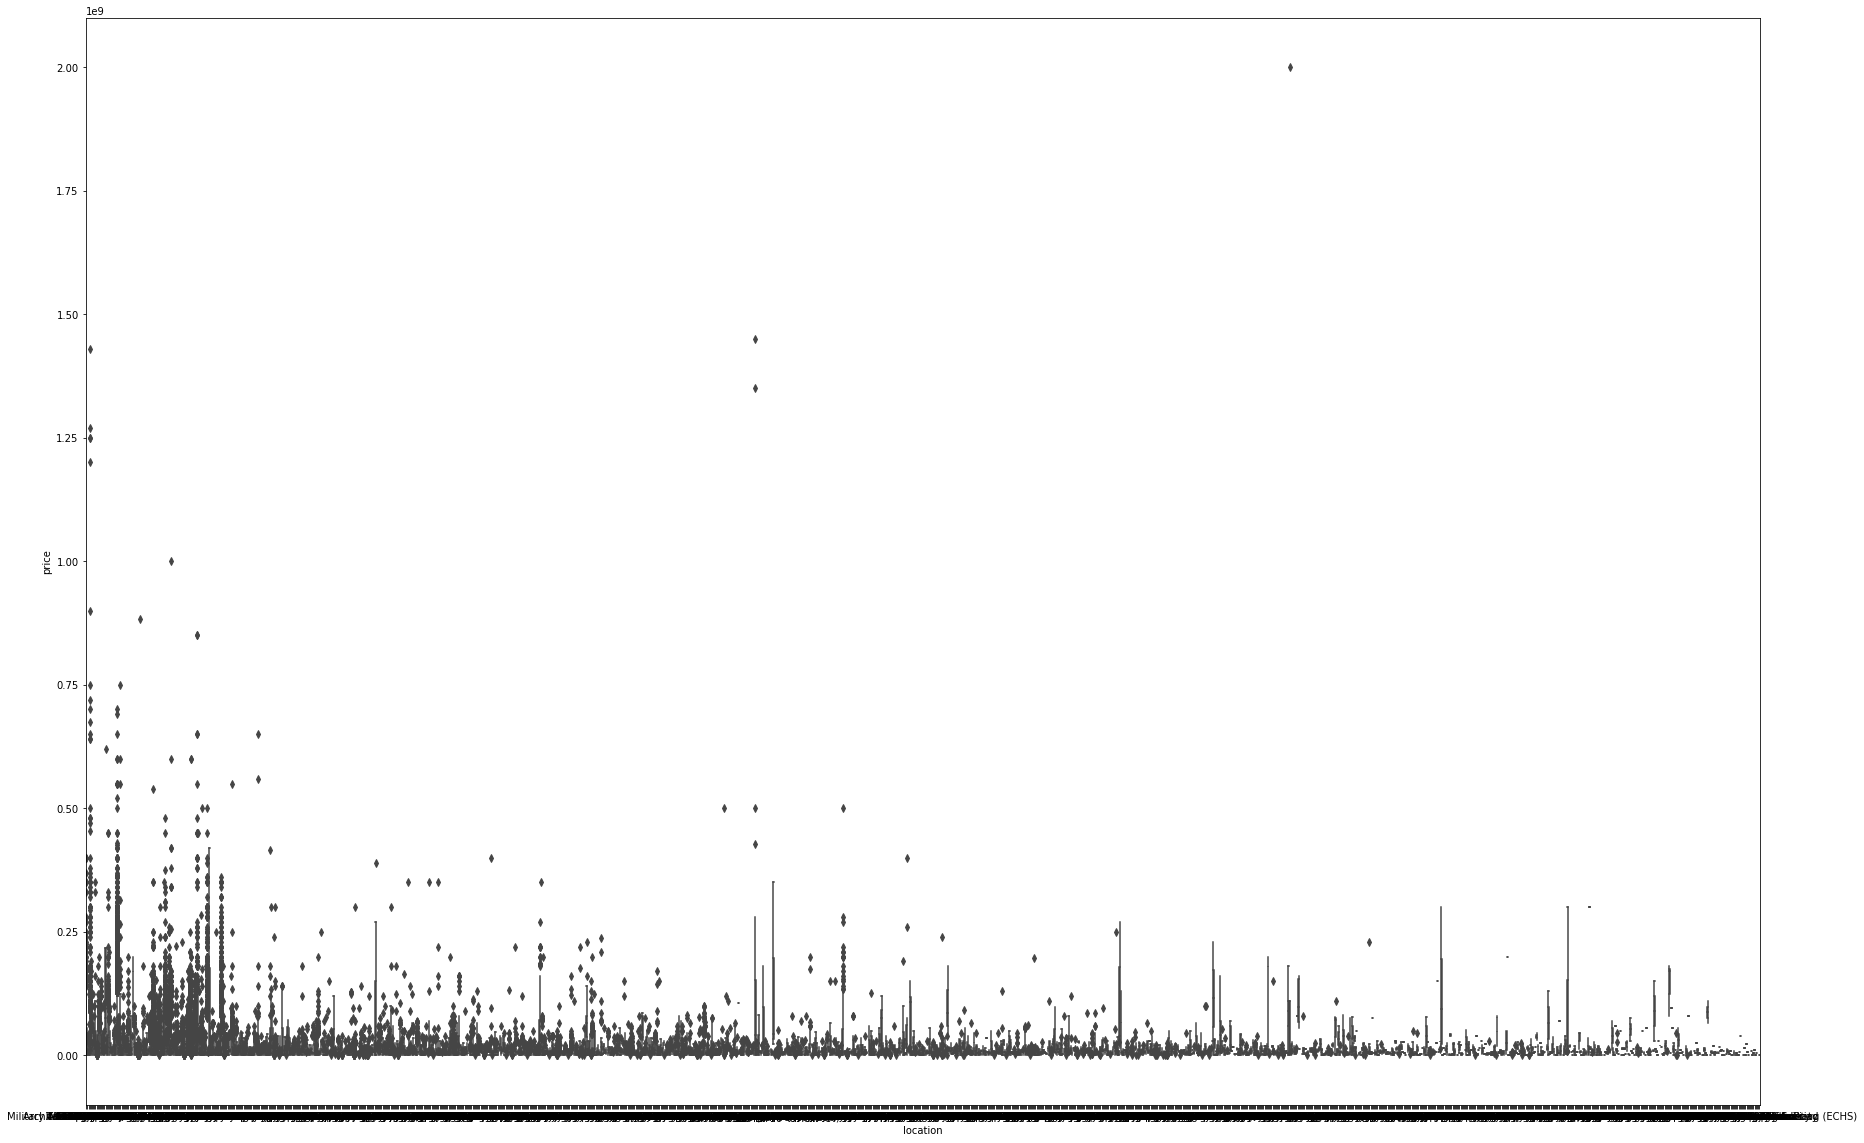

In [ ]:
plt.figure(figsize=(30, 20))
sns.boxplot(df['location'],df['price'])


### **latitude and price column (numerical and numerical)**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


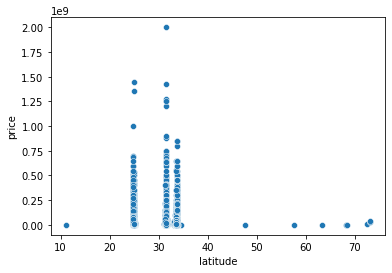

In [ ]:
sns.scatterplot(df['latitude'],df['price'])

### **longitude and price column (numerical and numerical)**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


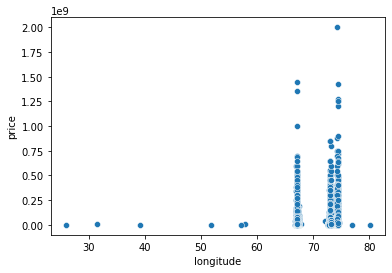

In [ ]:
sns.scatterplot(df['longitude'],df['price'])

### Whose latitude or langitude is higher, have higher price

## ***City and price(categorical and numercal)***

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


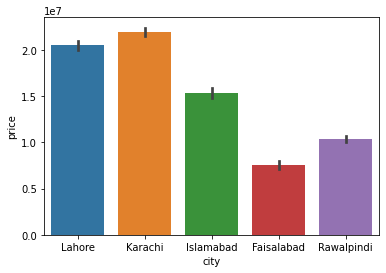

In [ ]:
sns.barplot(df['city'],df['price'])

### Price in Karachi is higher than other cities

##***Province_name and Price (categorical and numerical)***

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


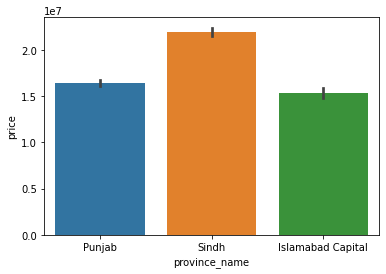

In [ ]:
sns.barplot(df['province_name'],df['price'])

# ***1.3 Feature Scaling***

## **Here we Encode all the column to apply Linear regression**

In [ ]:
df['property_type'] = df['property_type'].astype('category').cat.codes
df['city'] = df['city'].astype('category').cat.codes
df['province_name'] = df['province_name'].astype('category').cat.codes
df['location'] = df['location'].astype('category').cat.codes
df['price'] = df['price'].astype('category').cat.codes


In [ ]:
df.head()

,property_type,price,location,city,province_name,latitude,longitude,area_marla
0,2,1549,938,3,1,31.483869,74.325686,120.0
1,2,1233,959,3,1,31.431593,74.179980,20.0
2,2,954,413,3,1,31.499348,74.416959,9.0
3,2,1470,557,3,1,31.522069,74.355512,20.0
4,2,1086,115,3,1,31.506483,74.286017,11.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97675 entries, 0 to 97674
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  97675 non-null  int8   
 1   price          97675 non-null  int16  
 2   location       97675 non-null  int16  
 3   city           97675 non-null  int8   
 4   province_name  97675 non-null  int8   
 5   latitude       97674 non-null  float64
 6   longitude      97674 non-null  float64
 7   area_marla     97674 non-null  float64
dtypes: float64(3), int16(2), int8(3)
memory usage: 2.9 MB


# ***1.4 Liner Regression***

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

## **1.4.1 Data Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['property_type', 'city', 'province_name','location']]
y = df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 30)

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

## ***1.4.2 Prediction***

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
result = pd.DataFrame({'Ground Truth value' : y_test, 'Predicted Value' : y_pred})
result

,Ground Truth value,Predicted Value
6669,1301,764.689268
44428,131,513.621865
1476,1046,816.238544
80865,1200,642.662616
46604,1116,754.418479
...,...,...
60799,1142,622.431230
94428,1268,764.689268
57079,28,907.860971
6938,1320,797.282389


## **1.4.3 Mean Square Error**

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
MSE=mean_squared_error(y_test, y_pred)
print('Linear Regression Mean Square Error:',MSE )

Linear Regression Mean Square Error: 227335.09591706967


##***1.4.2 r2-score***

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
print('Linear Regression R2 Score:', r2_score(y_test, y_pred))

Linear Regression R2 Score: 0.1315100659309909
